## Linear Regression Project
Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Ecommerce Customers")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


# Impressions 

1. No null value
2. Small data set

# EDA

In [5]:
sns.set_palette("Dark2_r")
sns.set_style('whitegrid')

<Figure size 432x576 with 0 Axes>

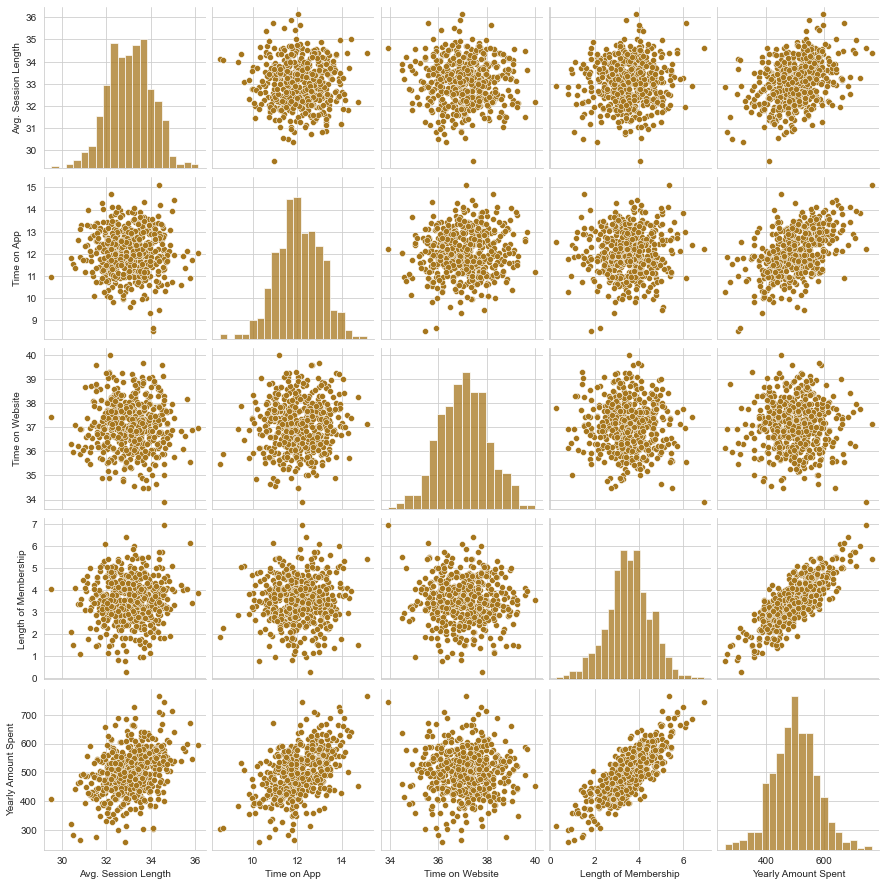

In [6]:
plt.figure(figsize=(6,8))
sns.pairplot(df)

In [7]:
# Lets explore a few relations here wrt of how some of the columns affect other

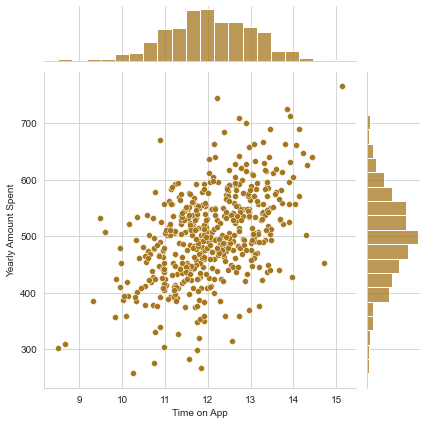

In [8]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=df)

In [9]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Length of Membership'>

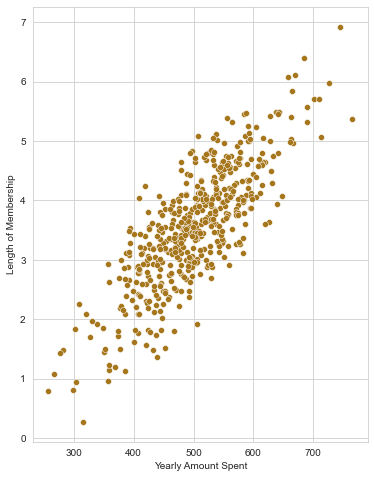

In [10]:
plt.figure(figsize=(6,8))
sns.scatterplot(x='Yearly Amount Spent', y='Length of Membership', data=df)

<AxesSubplot:xlabel='Time on App', ylabel='Time on Website'>

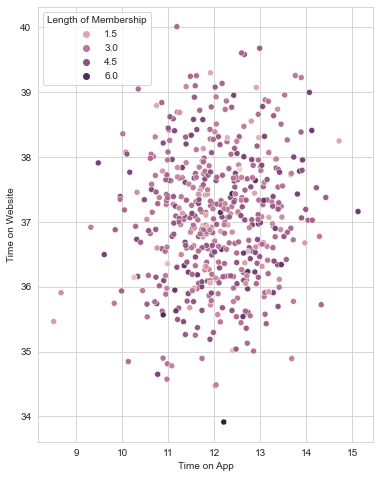

In [11]:
plt.figure(figsize=(6,8))
sns.scatterplot(x='Time on App', y='Time on Website', hue='Length of Membership', data=df)

<AxesSubplot:xlabel='Time on App', ylabel='Length of Membership'>

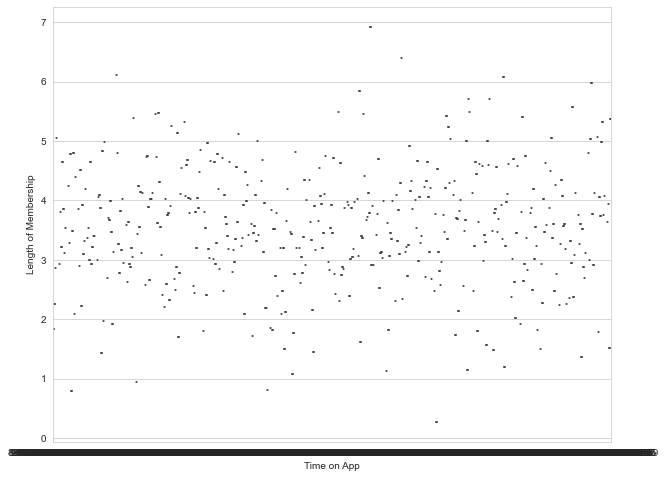

In [12]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Time on App', y='Length of Membership', data=df)

In [13]:
# Since the above example is clearly not yeilding any value, let's try binning the data and plot the relationship

In [14]:
print([str(i) for i in np.arange(0, 7, 0.5)])

['0.0', '0.5', '1.0', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0', '4.5', '5.0', '5.5', '6.0', '6.5']


In [16]:
df["Binner Membership Length"] = pd.cut(x = df['Length of Membership'],
                                        bins = np.arange(df['Length of Membership'].min(),
                                                         df['Length of Membership'].max(),
                                                         0.5),
                                        labels = [i for i in np.arange(0, 7, 0.5)][:-1],
                                        include_lowest = True)

In [17]:
df["Binner Membership Length"]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


0      3.5
1      2.0
2      3.5
3      2.5
4      4.0
      ... 
495    3.0
496    3.0
497    4.5
498    2.0
499    2.0
Name: Binner Membership Length, Length: 500, dtype: category
Categories (13, float64): [0.0 < 0.5 < 1.0 < 1.5 ... 4.5 < 5.0 < 5.5 < 6.0]

<AxesSubplot:xlabel='Binner Membership Length', ylabel='Time on App'>

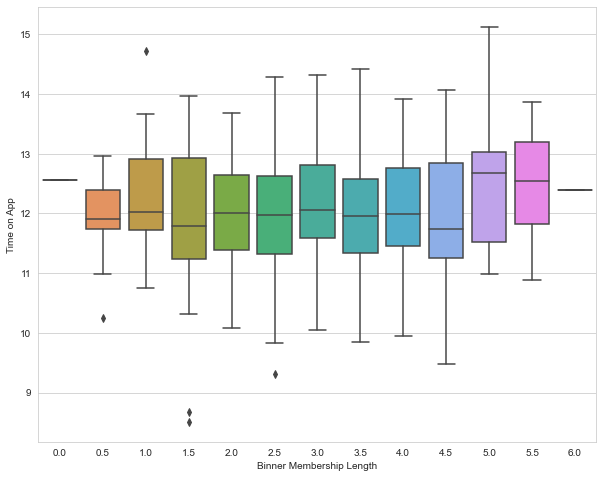

In [18]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Time on App', x='Binner Membership Length', data=df)

## Impression

We can see that irrespective of the membership lenght, all people like to spend time on the application

In [19]:
df['Time on App'].nunique()

500

In [20]:
df['Time on App'].max()

15.126994288792469

In [21]:
df['Time on App'].min()

8.508152176032603

In [22]:
df['Binned Time on App'] = pd.cut(x=df['Time on App'],
                                 bins=np.arange(df['Time on App'].min(), df['Time on App'].max(), 0.5),
                                 labels=[i for i in np.arange(df['Time on App'].min(), df['Time on App'].max(), 0.5)][:-1],
                                 include_lowest=True
                                )

In [23]:
df['Binned Time on Website'] = pd.cut(x=df['Time on Website'],
                                 bins=np.arange(df['Time on Website'].min(), df['Time on Website'].max(), 0.5),
                                 labels=[i for i in np.arange(df['Time on Website'].min(), df['Time on Website'].max(), 0.5)][:-1],
                                 include_lowest=True
                                )

In [24]:
df['Time on Website'].min()

33.91384724758464

In [25]:
df['Time on Website'].max()

40.005181638101895

In [26]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Binner Membership Length,Binned Time on App,Binned Time on Website
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,3.5,12.508152,39.413847
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,2.0,11.008152,36.913847
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,3.5,11.008152,36.913847
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,2.5,13.508152,36.413847
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,4.0,12.508152,37.413847


In [27]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


<AxesSubplot:>

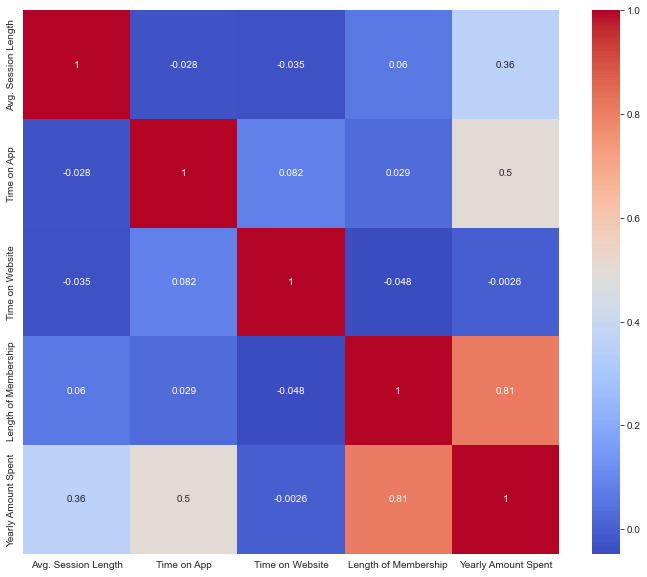

In [28]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

<AxesSubplot:>

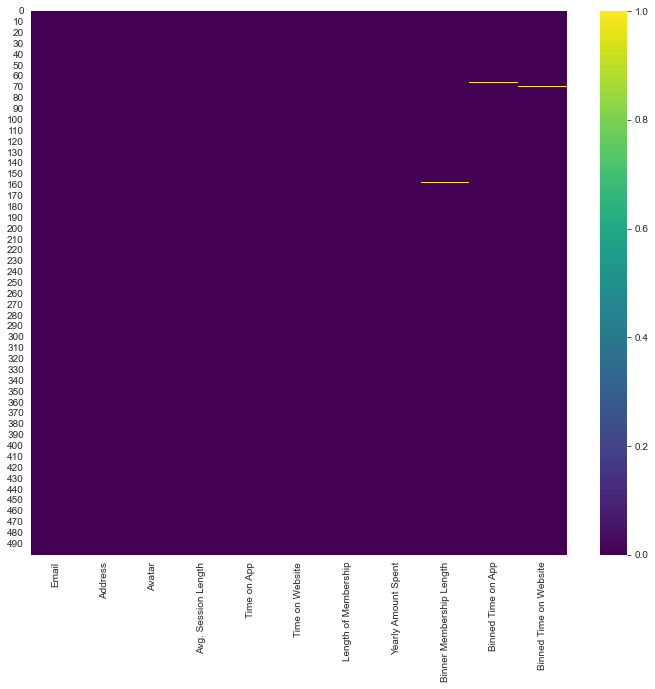

In [29]:
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull(), cmap='viridis')

In [30]:
df['Binned Time on App'].isnull().value_counts()

False    499
True       1
Name: Binned Time on App, dtype: int64

In [31]:
df.dropna(inplace=True)

In [32]:
# df.drop(['Binned Time on App', 'Binner Membership Length'], axis=1, inplace=True)

<AxesSubplot:>

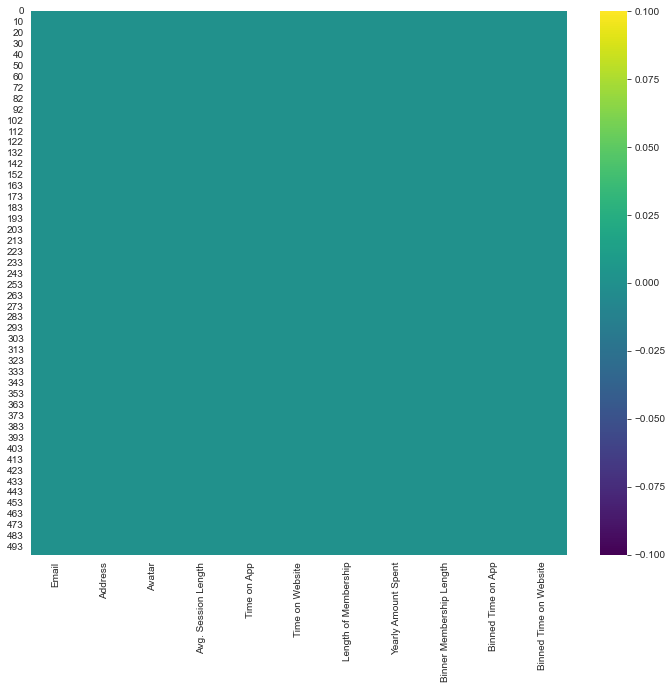

In [33]:
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull(), cmap='viridis')

<AxesSubplot:>

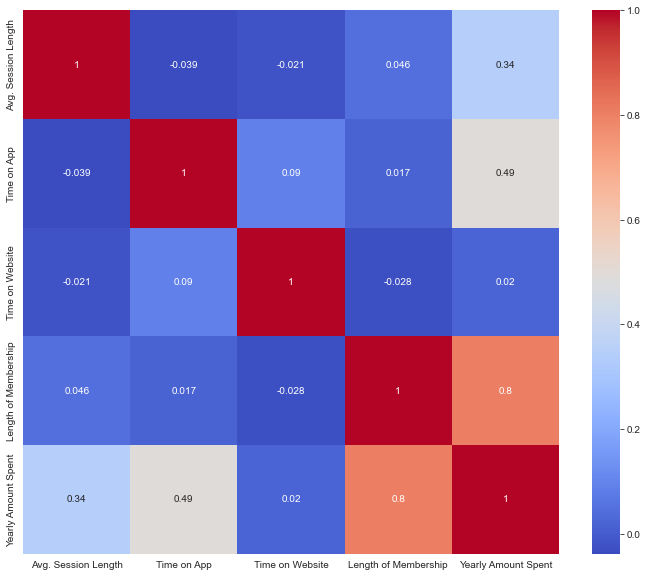

In [34]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [35]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent',
       'Binner Membership Length', 'Binned Time on App',
       'Binned Time on Website'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


<AxesSubplot:xlabel='Binner Membership Length', ylabel='count'>

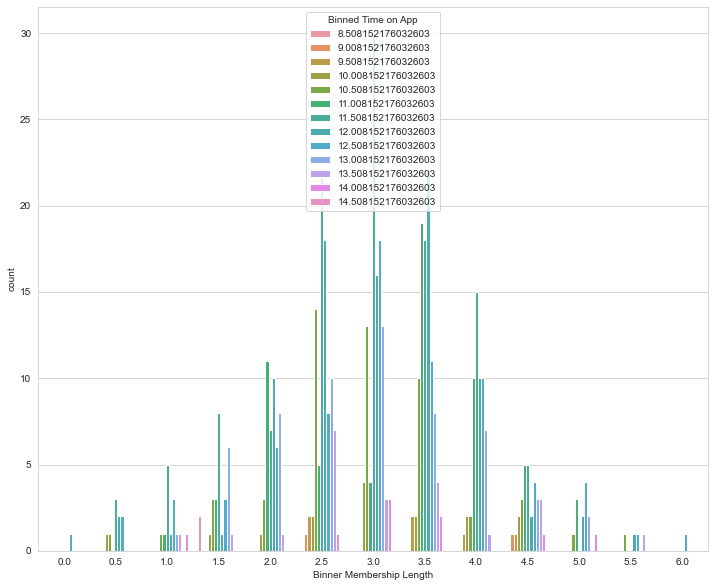

In [36]:
plt.figure(figsize=(12,10))
sns.countplot(hue='Binned Time on App', x='Binner Membership Length', data=df)

<AxesSubplot:xlabel='Binner Membership Length', ylabel='count'>

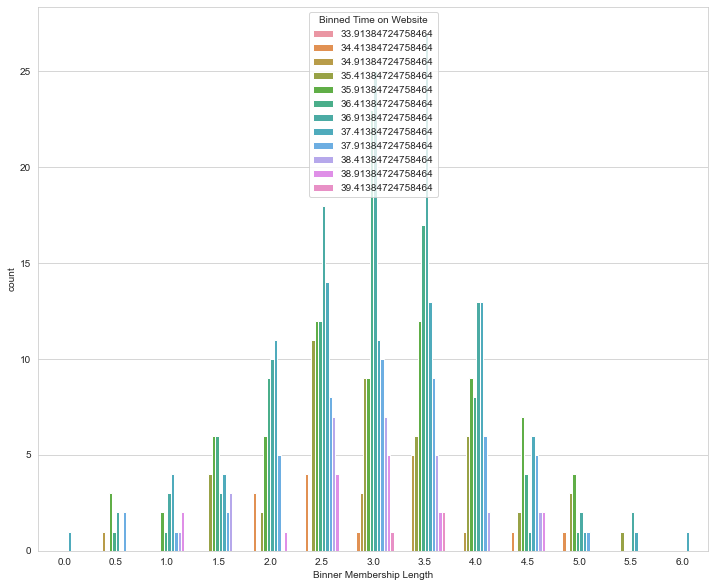

In [37]:
plt.figure(figsize=(12,10))
sns.countplot(hue='Binned Time on Website', x='Binner Membership Length', data=df)

<AxesSubplot:xlabel='Binned Time on Website', ylabel='Binned Time on App'>

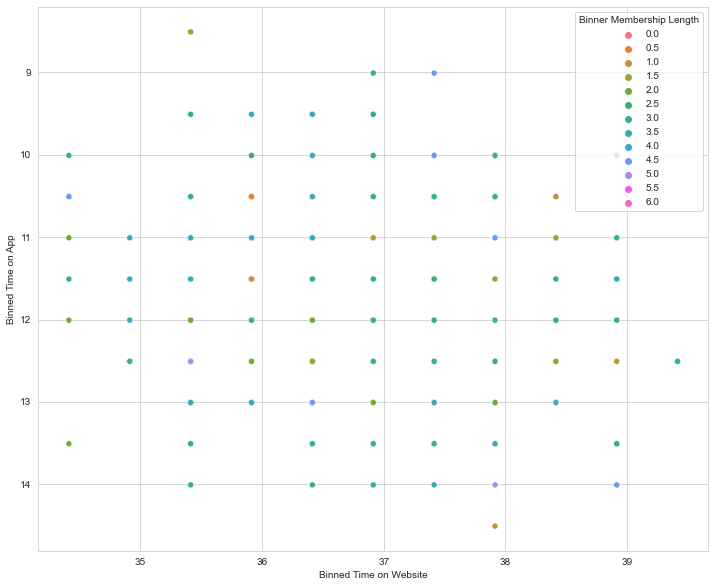

In [38]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='Binned Time on Website', y='Binned Time on App', hue='Binner Membership Length', data=df, legend=True)

In [39]:
# plt.figure(figsize=(12,10))
# sns.lmplot(x='Binned Time on App', hue='Binner Membership Length', data=df)

In [40]:
df.shape

(497, 11)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [42]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent',
       'Binner Membership Length', 'Binned Time on App',
       'Binned Time on Website'],
      dtype='object')

In [43]:
X = df.drop(['Email', 'Address', 'Avatar',
             'Binner Membership Length',
             'Binned Time on App',
             'Binned Time on Website',
             'Yearly Amount Spent'], axis=1)
y = df['Yearly Amount Spent']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [45]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [46]:
y_pred = lr.predict(X_test)

In [47]:
y_pred

array([463.50062112, 455.1331774 , 447.67351044, 401.24843437,
       313.31527825, 609.85909494, 457.28610333, 590.20307798,
       462.53625107, 448.37249621, 336.34944788, 506.38906705,
       479.76960104, 426.54278598, 610.37457936, 545.49631001,
       584.77905796, 395.72057006, 577.4174663 , 572.83046261,
       464.05077733, 497.19431405, 476.40691849, 460.57016197,
       496.80302886, 336.113139  , 595.35332256, 411.1962182 ,
       416.33088399, 467.24881615, 504.34871254, 551.28021343,
       459.78618851, 483.61022512, 533.90603643, 391.0352637 ,
       285.95929577, 529.60505089, 623.33339605, 606.96408027,
       434.89576282, 552.69999597, 499.48128363, 409.04611332,
       543.32682375, 569.71284841, 525.36591446, 504.76021939,
       429.78725601, 555.59605625, 457.29329954, 547.3442646 ,
       423.72176602, 398.41409109, 642.98819022, 540.80050985,
       456.85125952, 515.3826216 , 572.94218216, 507.6447915 ,
       511.48387734, 507.42887296, 553.25669862, 543.46

In [48]:
lr.coef_

array([26.28677469, 38.77764069,  0.09247235, 61.67950916])

In [49]:
lr.intercept_

-1058.6867570898671

Text(0, 0.5, 'Y Test')

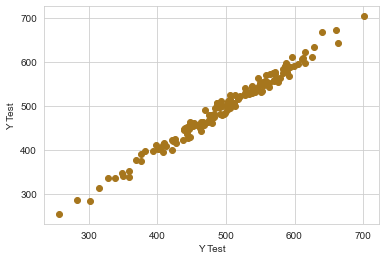

In [50]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Y Test')

In [51]:
# Let's get the prediction score
from sklearn import metrics


print("MAE    : {}".format(metrics.mean_absolute_error(y_test, y_pred)))
print("MSE    : {}".format(metrics.mean_squared_error(y_test, y_pred)))
print("RMSE   : {}".format(metrics.mean_absolute_error(y_test, y_pred)**0.5))

MAE    : 8.533472510644382
MSE    : 112.54963998926071
RMSE   : 2.921210795311489


## Conclusion

In [52]:
coefficients = pd.DataFrame(lr.coef_, X.columns)
coefficients.columns = ['Coefficient']
coefficients


# coeffecients = pd.DataFrame(lm.coef_,X.columns)
# coeffecients.columns = ['Coeffecient']
# coeffecients



,Coefficient
Avg. Session Length,26.286775
Time on App,38.777641
Time on Website,0.092472
Length of Membership,61.679509


## Trial 2 : Lets just consider these values 
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
and train out model

In [53]:
X = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [54]:
lr1 = LinearRegression()

In [55]:
lr1.fit(X_train, y_train)

LinearRegression()

In [56]:
y_pred = lr1.predict(X_test)

Text(0, 0.5, 'Y Pred')

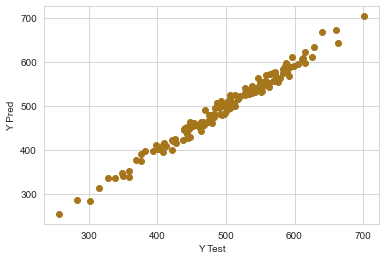

In [57]:
plt.scatter(y_test, y_pred)
plt.xlabel("Y Test")
plt.ylabel('Y Pred')

In [58]:
coefficient = pd.DataFrame(lr1.coef_, X.columns)
coefficient.columns = ['Coefficient']
coefficient

,Coefficient
Avg. Session Length,26.286775
Time on App,38.777641
Time on Website,0.092472
Length of Membership,61.679509


# Conclusions

1. Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 26.286775 total dollars spent.
2. Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 38.777641 total dollars spent.
3. Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.092472 total dollars spent.
4. Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.679509 total dollars spent.

So its clearly evident that compnay should focus more on **Application** and shut down website probably!